In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss
import scipy.stats as s

In [2]:
df = pd.read_csv('autos_after_cleaning.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3t�rer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367542 entries, 0 to 367541
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          367542 non-null  object
 1   name                 367542 non-null  object
 2   seller               367542 non-null  object
 3   offerType            367542 non-null  object
 4   price                367542 non-null  int64 
 5   abtest               367542 non-null  object
 6   vehicleType          367542 non-null  object
 7   yearOfRegistration   367542 non-null  int64 
 8   gearbox              367542 non-null  object
 9   powerPS              367542 non-null  int64 
 10  model                367542 non-null  object
 11  kilometer            367542 non-null  int64 
 12  monthOfRegistration  367542 non-null  int64 
 13  fuelType             367542 non-null  object
 14  brand                367542 non-null  object
 15  notRepairedDamage    367542 non-nu

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.675420e+05,367542.000000,367542.000000,367542.000000,367542.000000,367542.0,367542.000000
mean,1.081267e+04,2003.445786,115.464616,126042.452291,6.157209,0.0,50843.468602
std,6.406247e+05,7.513840,191.249005,39673.873922,3.285551,0.0,25779.742600
min,0.000000e+00,1910.000000,0.000000,5000.000000,1.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,71.000000,125000.000000,3.000000,0.0,30519.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49632.000000
75%,7.100000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71549.000000
max,1.000000e+08,2019.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### 1).Perform general Data analysis

In [6]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


Performing general data analysis involves several steps.Those are,

1. Data Collection:
   - Obtain the dataset from a reliable source. This could be in the form of a      CSV file.

2. Data Cleaning:
   - Check for missing values,inconsistencies in the data.
   - Handle missing data through imputation or removal.
   - Standardize data formats.
 
3. Exploratory Data Analysis (EDA):
   - Visualize the data using graphs, histograms, box plots, scatter plots          etc.,
   - to understand the distribution,relationships and patterns.
   - Calculate summary statistics (mean, median, standard deviation, etc.) to        describe the data.
 
4. Reporting:

   - Communicate the findings effectively, using visualizations, reports, or        presentations.

### 2. Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

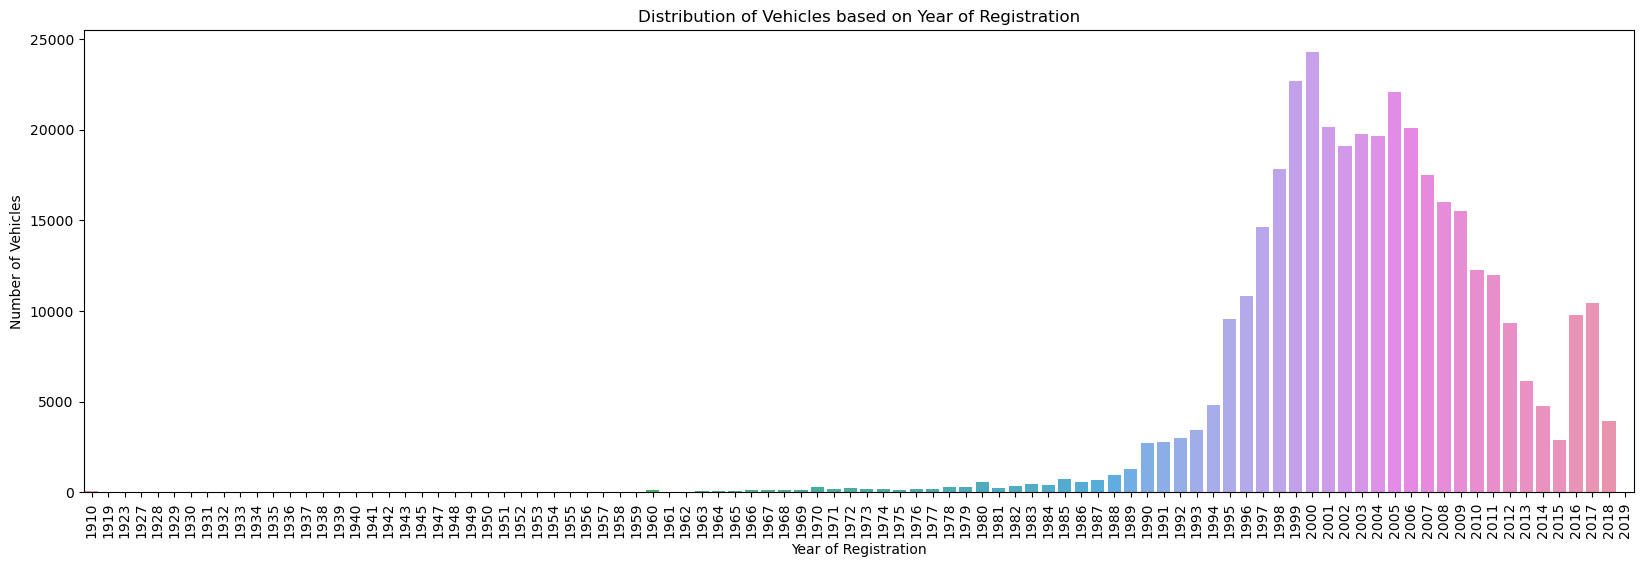

In [7]:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'yearOfRegistration')
plt.title('Distribution of Vehicles based on Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 90)  # Rotate x-labels for better readability
plt.show()

#### 3. Create a plot based on the Variation of the price range by the vehicle type.|

In [8]:
vehicle_type_price = df.groupby('vehicleType')['price'].mean()
vehicle_type_price = vehicle_type_price.reset_index()

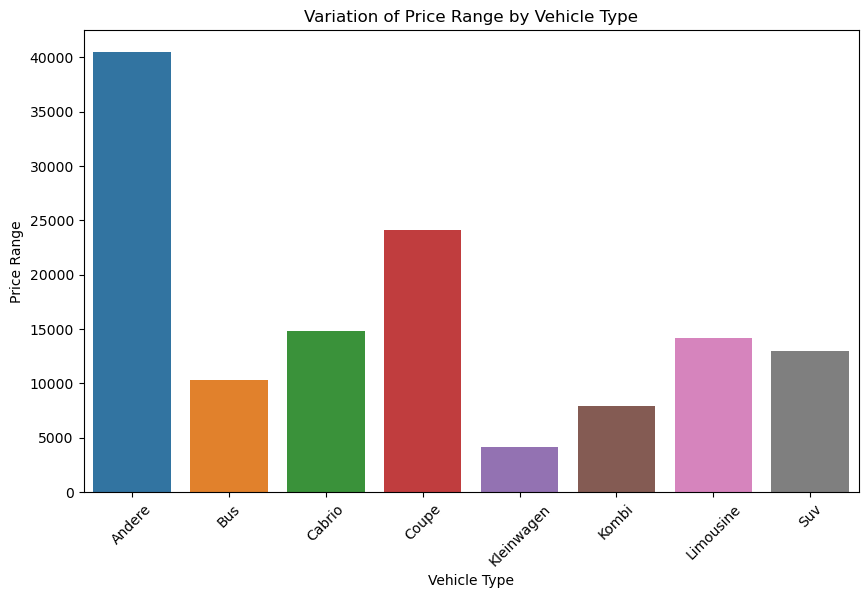

In [9]:
plt.figure(figsize = (10, 6))
sns.barplot(y = "price",x="vehicleType",data=vehicle_type_price)
plt.xlabel('Vehicle Type')
plt.ylabel('Price Range')
plt.title('Variation of Price Range by Vehicle Type')
plt.xticks(rotation = 45)  # Rotate x-axis labels for readability
plt.show()

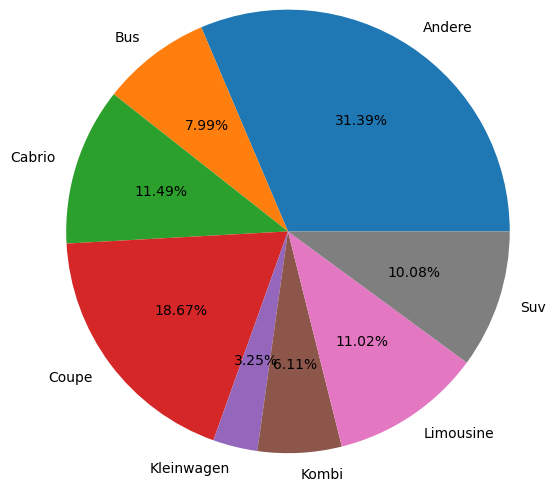

In [10]:
plt.pie(vehicle_type_price.price, labels = vehicle_type_price.vehicleType,autopct = '%1.2f%%',radius = 1.5)
plt.show()

#### 4. Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client.

In [11]:
Vehicle_count = df["vehicleType"].value_counts()

In [12]:
Vehicle_count

Limousine     114818
Kleinwagen     95859
Kombi          68065
Bus            30129
Cabrio         22504
Coupe          18567
Suv            14510
Andere          3090
Name: vehicleType, dtype: int64

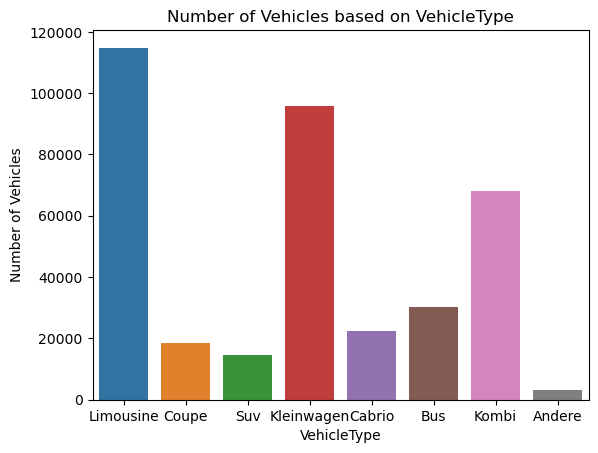

In [13]:
sns.countplot(data=df, x='vehicleType')
plt.title('Number of Vehicles based on VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('Number of Vehicles')
plt.show()

#### 5. Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis).

In [14]:
correlation = df['price'].corr(df['kilometer'])
correlation

-0.007683223435759002

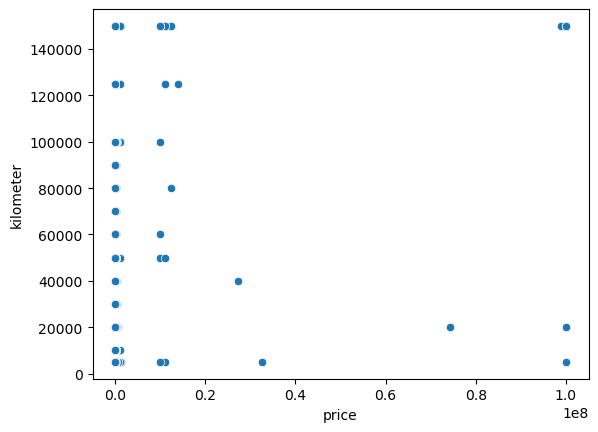

In [15]:
sns.scatterplot(x = "price",y = "kilometer",data = df)
plt.show()